In [55]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
from source.datasets import CatBallDataset, AnalogBits, custom_collate_with_info
import numpy as np
import jlc
import torch


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
false = False
true = True
",".join([k for k in {
        "image_encoder": ["none",                   "Image encoder to use. TYPE: One of ['none','resnet','stylegan2']. DEFAULT: 'none'"],
        "dropout": [0.0,                            "UNet dropout probability. TYPE: float. DEFAULT: 0.0"],
        "predict": ["x",                            "How to parmeterize x_t. TYPE: One of ['x','v','eps','both']. DEFAULT: 'x'"],
        "use_scale_shift_norm": [false,             "Should scaling and shifting of normalization layers be be used for class conditioning? otherwise simply linear addition. TYPE: boolean. DEFAULT: false"],
        "num_res_blocks": [3,                       "Number of residual blocks per scale. TYPE: positive integer. DEFAULT: 3"],
        "num_heads": [4,                            "Number of attention heads for downsampling and middle blocks. TYPE: positive integer. DEFAULT: 4"], 
        "num_heads_upsample": [-1,                  "Number of attention heads for upsampling. TYPE: positive integer or -1 (same as num_heads). DEFAULT: -1"],
        "num_channels": [64,                        "Base channel number. TYPE: positive integer. DEFAULT: 64"],
        "attention_resolutions": ["-2,-1",          "Resolutions to perform attention on. TYPE: comma separated list of integers representing idx with -1 being the deepest resolution. DEFAULT: '-2,-1'"],
        "image_size": [128,                         "Image resolution. TYPE: positive integer. DEFAULT: 128"],
        "deeper_net": [true,                        "Should a deeper net be used? TYPE: boolean. DEFAULT: true"],
        "weak_signals": [false,                     "Should weak signals (bbox,points) be used? TYPE: boolean. DEFAULT: false"],
        "num_classes": [0,                          "Number of classes. TYPE: positive integer or 0 (no classes). DEFAULT: 0"],
        "datasets_as_classes": [false,              "Should datasets be treated as classes? TYPE: boolean. DEFAULT: false"],
        "self_conditioning": [false,                "Should self conditioning during diffusion be used? TYPE: boolean. DEFAULT: false"]
    }.keys()])

'image_encoder,dropout,predict,use_scale_shift_norm,num_res_blocks,num_heads,num_heads_upsample,num_channels,attention_resolutions,image_size,deeper_net,weak_signals,num_classes,datasets_as_classes,self_conditioning'

In [10]:
import torch
torch.log(torch.tensor(10))

tensor(2.3026)

In [27]:
a = np.array([1, 1, 3, 4, 0, 0, 0]).reshape(-1,1)
ab = AnalogBits(permanent_seed=42)
b = ab.int2bit(a)
print(b)
c = ab.bit2int(b)
print(c)

[[1 0 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1]
 [0 1 0 1 0 0 0 0]
 [1 1 0 0 1 1 1 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
[[1]
 [1]
 [3]
 [4]
 [0]
 [0]
 [0]]


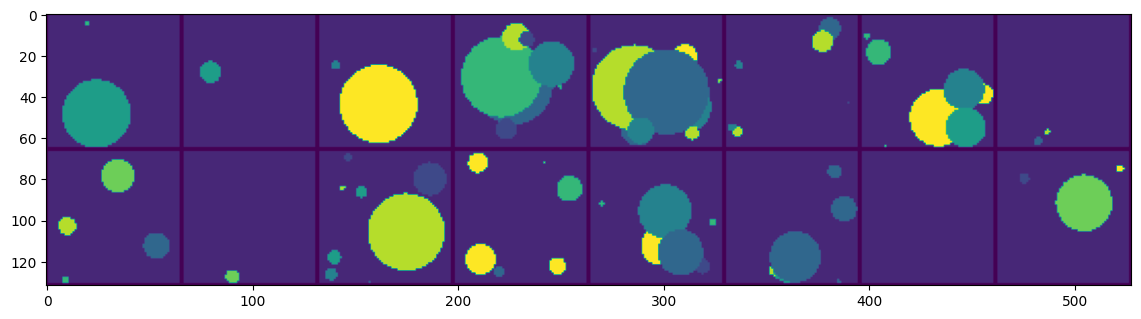

In [56]:
dataset = CatBallDataset(num_balls=list(range(10)))
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True, num_workers=0,collate_fn=custom_collate_with_info)

batch = next(iter(dataloader))
montage_im = jlc.montage(batch[0].float(),return_im=True,imshow=False,n_col=8,padding=1,padding_color=-1)
plt.figure(figsize=(14,8))
plt.imshow(montage_im)

TypeError: 'type' object is not iterable